In [16]:
import dlib
import cv2


In [17]:
import dlib
from google.colab import files
from PIL import Image

# Download the shape predictor file
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

--2023-06-23 16:02:31--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  71.2MB/s    in 0.9s    

2023-06-23 16:02:32 (71.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bunzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [18]:
predictor_path = "shape_predictor_68_face_landmarks.dat"
landmark_detector = dlib.shape_predictor(predictor_path)


In [19]:
# Upload an image file
uploaded = files.upload()
image_path = next(iter(uploaded))

Saving fotor-ai-2023062218154.jpg to fotor-ai-2023062218154 (1).jpg


In [20]:
import matplotlib.pyplot as plt


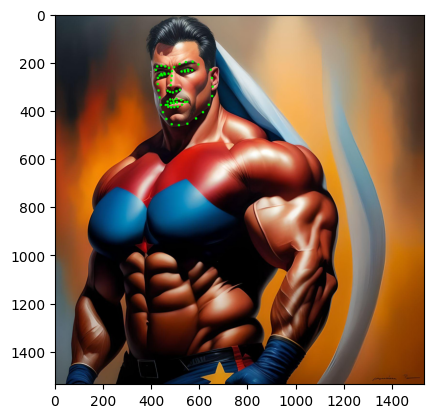

In [21]:
# Load the uploaded image
# image = Image.open(image_path)
image = dlib.load_rgb_image(image_path)
# Convert the image to grayscale
# gray_image = image.convert("L")

# Detect facial landmarks
face_detector = dlib.get_frontal_face_detector()
faces = face_detector(image , 1 )

landmark_tuple = []
for k, d in enumerate(faces):
    landmarks = landmark_detector(img , d)
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmark_tuple.append((x, y))
        cv2.circle(image , (x, y), 5, (0, 255, 0), -1)

plt.imshow(image)